In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.size": 22, "font.family": "serif", "font.serif": ["computer modern roman"]})
plt.rcParams.update({"font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"


The path is: /home/ucecabj/Desktop/MFI_git


### Plot Figure 1

In [2]:
###--- Load 1D data
[x_1d, y_1d, FES_1d, ofe_1d, cutoff_1d, error_evol_1d, HILLS_1d] = MFI.load_pkl(path_manustript +"Figure1/" + "data_figure_1A.pkl")

###--- Load Alanine Dipeptide data
[X, Y, FES, ofe, cutoff, time_history, ofe_history, volume_history, HILLS, cutoff_700, cutoff_2200, cutoff_9400] = MFI.load_pkl(path_manustript +"Figure1/" + "data_figure_1B.pkl")

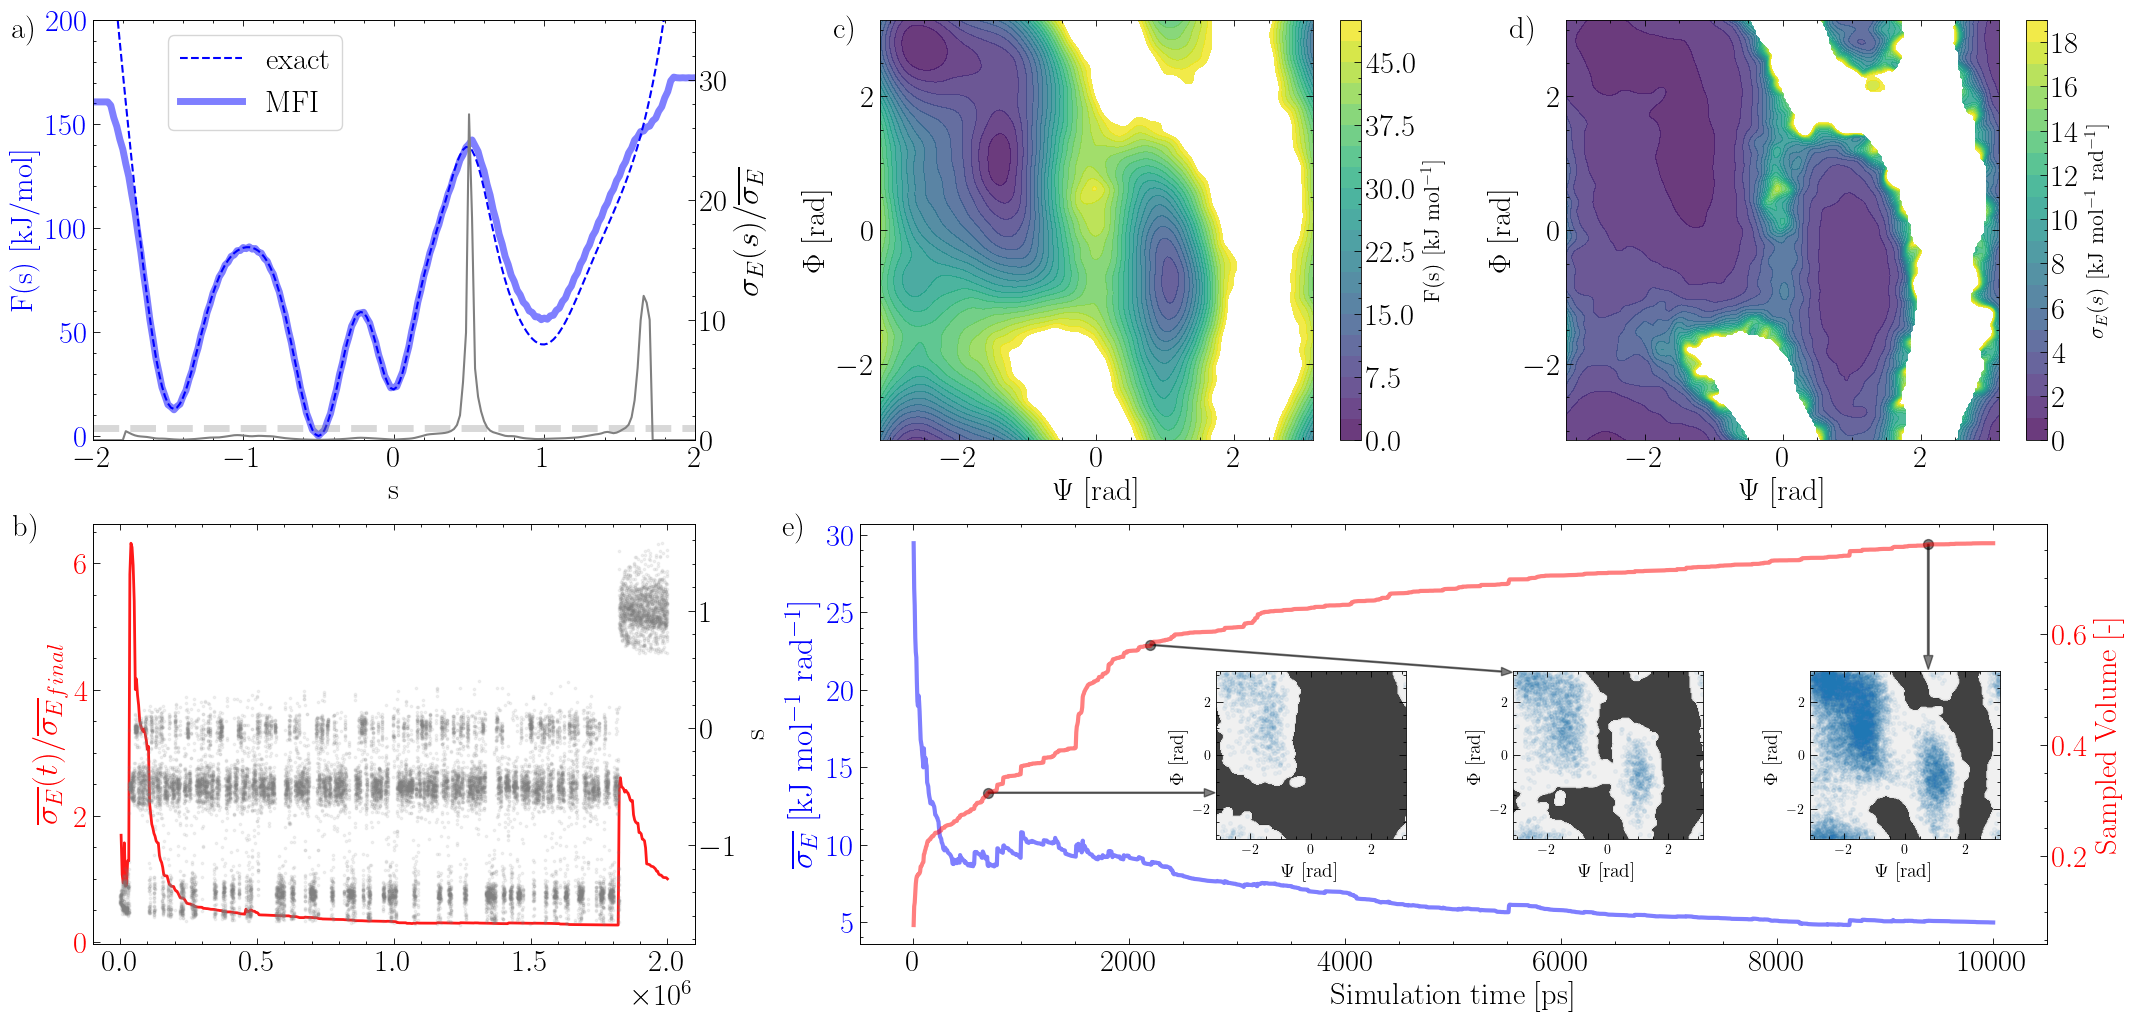

In [3]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(26,12))
gs = gridspec.GridSpec(2, 100)


ax1 = fig.add_subplot(gs[0, :30])
ax12 = ax1.twinx()
ax2 = fig.add_subplot(gs[0, 39:66])  
ax3 = fig.add_subplot(gs[0, 73:]) 
ax4 = fig.add_subplot(gs[1, :30])
ax42 = ax4.twinx() 
ax5 = fig.add_subplot(gs[1, 38:97])
ax52 = ax5.twinx() 


#################   Plot FES and ofe  #################

#Left plot
ax1.set_ylabel('F(s) [kJ/mol]',color='blue')
ax1.set_xlabel('s')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,200)
ax1.plot(x_1d, y_1d-min(y_1d),'--',color='blue',label='exact');
ax1.plot(x_1d, FES_1d,color='blue',linewidth=5,alpha=0.5,label="MFI");
ax1.tick_params(axis ='y', labelcolor = 'blue')
ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

ax12.set_ylabel('$\sigma_E(s)/\overline{\sigma_E}$', fontsize=24, color='black')
ax12.tick_params(axis ='y', labelcolor = 'black', right = True , labelright = True ) 
ax12.set_ylim([0, 35] ) 
# ax1.set_yscale("log")
# ax1.plot(X_dw, ofe_dw*cutoff_dw/np.mean((ofe_dw)*cutoff_dw),color="grey",label="$\sigma^2(s)$");
ax12.plot(x_1d, ofe_1d*cutoff_1d / (np.sum(ofe_1d*cutoff_1d) / np.count_nonzero(cutoff_1d)),color="grey");
ax12.plot(x_1d, np.zeros(len(x_1d))+1,'--',linewidth=5,color="grey", alpha=0.3);

#################   ofe progression and CV progresstion  #################

ax4.plot([time/0.005 for time in error_evol_1d[3]], error_evol_1d[1]/error_evol_1d[1][np.size(error_evol_1d[1])-1],color='red',linewidth=2,alpha=0.9);
ax4.set_ylabel('$\overline{\sigma_E}(t)/\overline{\sigma_E}_{final}$', fontsize=24, color='red')
ax4.tick_params(axis ='y', labelcolor = 'red')
ax42.set_xlabel('Simulation steps')
ax42.set_ylabel('s',color='black')
ax42.tick_params(axis ='y', labelcolor = 'black')
ax42.scatter(HILLS_1d[:,0]/0.005,HILLS_1d[:,1],color='grey',s=3, alpha=0.1)

#################   FES ALANINE DIPEPTIDE FES  #################


cp = ax2.contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=ax2)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
ax2.set_ylabel('$\Phi$ [rad]')
ax2.set_xlabel('$\Psi$ [rad]')
ax2.set_xlim(np.min(X),np.max(X))
ax2.set_ylim(np.min(Y),np.max(Y))

#################   OFE ALANINE DIPEPTIDE OFE  #################

cp = ax3.contourf(X, Y, MFI.zero_to_nan(ofe*cutoff), levels=np.arange(0, 20, 1), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=ax3)
cbar.set_label("$\sigma_E(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
ax3.set_ylabel('$\Phi$ [rad]')
ax3.set_xlabel('$\Psi$ [rad]')
ax3.set_xlim(np.min(X),np.max(X))
ax3.set_ylim(np.min(Y),np.max(Y))

#################  ALANINE DIPEPTIDE error progression  #################


ax5.plot( [time for time in time_history[1:]], (ofe_history[1:10_000]),color='blue',alpha=0.5,linewidth=3);
ax5.set_ylabel('$\overline{\sigma_E}$ [kJ mol$^{-1}$ rad$^{-1}$]',fontsize=24, color='blue')
ax5.tick_params(axis ='y', labelcolor = 'blue')
ax5.set_xlabel('Simulation time [ps]')

# V=np.multiply(volume_history[1:NH],np.power(2*np.pi,2))
ax52.set_xlabel('Simulation steps')
ax52.set_ylabel('Sampled Volume [-]',color='red')
ax52.tick_params(axis ='y', labelcolor = 'red')
ax52.plot( [time for time in time_history[1:]], volume_history[1:10_000],color='red',alpha=0.5,linewidth=3);

# plt.tight_layout()

#################  ALANINE DIPEPTIDE sampling  #################

inset_ax51 = inset_axes(ax5, width="16%", height="40%", loc = 'center' , bbox_to_anchor = ( -0.12, -0.05 , 1, 1), bbox_transform=ax5.transAxes, borderpad=3)
inset_ax51.contourf(X, Y, cutoff_700, cmap='gray', antialiased=False, alpha=0.8);
inset_ax51.scatter(HILLS[0:700,1],HILLS[0:700,2],s=7, alpha=0.05);
inset_ax51.set_ylabel('$\Phi$ [rad]', fontsize=14)
inset_ax51.set_xlabel('$\Psi$ [rad]', fontsize=14)
inset_ax51.set_xlim(np.min(X),np.max(X))
inset_ax51.set_ylim(np.min(Y),np.max(Y))
inset_ax51.tick_params(axis='both', labelsize=10)

inset_ax52 = inset_axes(ax5, width="16%", height="40%", loc = 'center' , bbox_to_anchor = ( 0.13, -0.05 , 1, 1), bbox_transform=ax5.transAxes, borderpad=3)
inset_ax52.contourf(X, Y, cutoff_2200, cmap='gray', antialiased=False, alpha=0.8);
inset_ax52.scatter(HILLS[0:2200,1],HILLS[0:2200,2],s=7, alpha=0.05);
inset_ax52.set_ylabel('$\Phi$ [rad]', fontsize=14)
inset_ax52.set_xlabel('$\Psi$ [rad]', fontsize=14)
inset_ax52.set_xlim(np.min(X),np.max(X))
inset_ax52.set_ylim(np.min(Y),np.max(Y))
inset_ax52.tick_params(axis='both', labelsize=10)

inset_ax53 = inset_axes(ax5, width="16%", height="40%", loc = 'center' , bbox_to_anchor = ( 0.38, -0.05 , 1, 1), bbox_transform=ax5.transAxes, borderpad=3)
inset_ax53.contourf(X, Y, cutoff_9400, cmap='gray', antialiased=False, alpha=0.8);
inset_ax53.scatter(HILLS[0:9400,1],HILLS[0:9400,2],s=7, alpha=0.05);
inset_ax53.set_ylabel('$\Phi$ [rad]', fontsize=14)
inset_ax53.set_xlabel('$\Psi$ [rad]', fontsize=14)
inset_ax53.set_xlim(np.min(X),np.max(X))
inset_ax53.set_ylim(np.min(Y),np.max(Y))
inset_ax53.tick_params(axis='both', labelsize=10)


#################  ALANINE DIPEPTIDE plot arrow  #################

# ax52.quiver(700, volume_history[int(700/5)] * (2*np.pi)**2, 2000, 0, scale_units='x', angles='xy', scale=1, linewidth=3)

arrow_style = {"head_width":0.015, "head_length":100, "color":"k", "width":0.002}
ax52.scatter(700, volume_history[int(700/5)], s=50, c="black", alpha=0.5)
ax52.arrow(x=700, y=volume_history[int(700/5)], dx=2000, dy=0, alpha=0.5, **arrow_style)

ax52.scatter(2200, volume_history[int(2200/5)], s=50, c="black", alpha=0.5)
ax52.arrow(x=2200, y=volume_history[int(2200/5)], dx=3250, dy=-0.048, alpha=0.5, **arrow_style)

arrow_style = {"head_width":85, "head_length":0.025, "color":"k", "width":15}
ax52.scatter(9400, volume_history[int(9400/5)], s=50, c="black", alpha=0.5)
ax52.arrow(x=9400, y=volume_history[int(9400/5)], dx=0, dy=-0.2, alpha=0.5, **arrow_style)

#################  PLOT TEXT  #################

h = [0.865, 0.45]
w = [0.094, 0.41, 0.67]
w22 = 0.39
fig.text(x=w[0], y=h[0], s="a)"); fig.text(x=w[1], y=h[0], s="c)"); fig.text(x=w[2], y=h[0], s="d)")
fig.text(x=w[0], y=h[1], s="b)"); fig.text(x=w22, y=h[1], s="e)")

plt.savefig(path_manustript + "Figure1/" + 'Figure1_MFI.png', dpi=600, bbox_inches='tight')
plt.show()
